<h1 align="center">Statistics for Machine Learning</h1>
<h2 align="center">Probability Distributions & Expected Values</h2>

&nbsp;

### Overview

Probability distributions show the probability of each possible outcome in a sample space for a random variable. These can be used to determine the answers to more complex probability questions, such as the probability of a weighted di rolling a value less than or equal to 4, or the probability a bus will arrive more than 5 minutes late. In reality, the exact probability distribution of a random variable may be difficult to predict, and so a histogram of measurements can be used to make an approximation. If a  random variable is measured enough times, the average of the measurements will tend to an expected value, and the collection of measurements will have a variance about this average. This concept is called *expectation* and is a useful tool to analyse random variables.

### Pre-requisites

This notebook builds on the concepts of measures of center and distributions introduced in *Introduction to Statistics* and *Distributions in Data*, as well as histograms which are covered in *Basic Data Visualisation*.

### Contents

Section 1 - Random Variables

Section 2 - Using Histograms to Approximate Probability Distributions

Section 3 - Probability Mass Functions

Section 4 - Probability Density Functions

Section 5 - Cumulative Distribution Functions

Section 6 - Conclusion

Section 7 - Glossary

Section 8 - References

### Imports

In [1]:
import math
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st 
from scipy.integrate import quad

mpl.rcParams['figure.dpi']= 100
plt.style.use('fivethirtyeight')

### Load Data

In [2]:
df = pd.read_csv('datasets/SOCR-HeightWeight.csv', sep=',')
heights = list(df['Height(Inches)'])
weights = list(df['Weight(Pounds)'])

heights.sort()
weights.sort()

print(f'Number of rows: {len(df)}')

Number of rows: 25000


<center><h2>Section 1 - Random Variables</h2></center>

### 1.1 - Recap of Random Variables

Random variables were briefly discussed in *Introduction to Statistics*, and are an important statistical concept. In the real world many events are governed by probability. These range from classic examples such as dice rolls and coin flips, to more everyday events such as the time that a bus arrives and the outcome of a sporting match. Some outcomes may be more likely than others, but it is rare that an outcome is absolutely certain. Most of the time, the chance of each event occuring has an element of randomness, and so variables that are governed by these events are called random variables. Random variables are represented using a single capital Roman letter. In the examples given above, the random variables are: a di roll, a coin flip, the number of minutes a bus is late by and the outcome of a sporting match. These variables may be written as: $D$ (for *di roll*), $C$ (for *coin flip*), $M$ (for *minutes late*), and $S$ (for *sporting match*) - though any reasonable choice of letter is acceptable. If only one random variable is being studied, it is common to label the variable *X*. If multiple variables are being used, it is useful to distinguish between them with meaningful letter choices. The set of all possible outcomes for a variable is called the **sample space**. A generic value in the sample space can be denoted with the corresponding lowercase letter, for example: $d$, $c$, $m$, and $s$ for the variables above. Numbered subscripts can be used to denote specific measurements, e.g. $d_1$, $d_2$ and so on.

&nbsp;


### 1.2 - Discrete Random Variables

Often measurements (or *observations*) of random variables are taken to see what the values are. For example, the roll of a di is a random variable; the outcome could be any value from 1 to 6. If a di is rolled and you look at which number it lands on, you have made a measurement. The same is true of a coin flip. If the coin is flipped and you look at which side the coin lands on, another measurement has been made.

In these examples, there are only a finite number of outcomes the measurement could be. For the di, there are only six possible outcomes: 1, 2, 3, 4, 5 or 6. For the coin flip there are two outcomes: heads or tails (assuming the coin does not land on its side). The term for a finite number of outcomes is **discrete**, and so events with a finite number of outcomes are called **Discrete Random Variables**.

&nbsp;


### 1.3 - Continuous Random Variables

Sometimes measurements do not have a finite number of outcomes, common examples of these are height and weight. Outcomes for these events are infinite since as long as the measurement device is precise enough a height or weight can be measured to an unlimited number of decimal places (or at least can be considered to be). Measurements like these are called **continuous**, and as such variables with these types of outcomes are called **Continuous Random Variables**.

&nbsp;


### 1.4 - Using Samples to Make Estimations about Random Variables

Histograms are often used to plot measurements of random variables. These graphs help visualise the data that has been collected, and can be used make estimates for the true mean and variance of a random variable. The collection of measurements taken is called a *sample*, and this concept is covered further in *Sampling a Distribution & Bessel's Correction*. An important distinction here is that the mean and variance of the measurements taken are not necessarily representative of the true mean and variance values for the random variable. For example, in a population of 7 billion people, it is perfectly reasonable to expect some sample groups of 100 people have a mean height higher than the population mean, and some to have an average height lower than the population mean. These sample means and variances can be used to make **estimations** of the true mean and variance however, and the accuracy of these estimations can be expected to increase as the sample size grows larger.

&nbsp;

<center><h2>Section 2 - Using Histograms to Approximate Probability Distributions</h2></center>

### 2.1 - Plotting Histograms for Discrete Random Variables

Although histograms are most often used with continuous data, they can also be used with discrete data. The width of the bars is equal to the distance between each possible measurement, with the beginning and end points lying on the midpoints between possible values. The **height** of the bars represents the number of measurements that fall into each bin. For example, rolling a di can only give values between 1 and 6. So a histogram of di rolls will have 6 bars, spaced between 0.5 and 1.5 for the first bar, 1.5 and 2.5 for the second bar, and so on up to 5.5 and 6.5 for the final bar. If there are 10 rolls of the number 1, the height of the bar between 0.5 and 1.5 will be proportional to 10. An example for this is shown below.

In this example a di is rolled 120 times, and the number of times the di lands on each face is recorded as the frequency for each outcome. The experiment is then repeated using 1200 rolls. A hypothesis might be that as the number of rolls increases, the frequency of each outcome in the sample space tends towards the same value (if the di is fair). So there is an equal chance of 16.67% that the di lands on any one face. To show that the bars approach 16.67% with more rolls, a 16.67% line has been added in red to the graphs. A two-way table has been included below to summarise the data for each roll.

&nbsp;

|                      |  1  |  2  |  3  |  4  |  5  |  6  |
|:--------------------:|:---:|:---:|:---:|:---:|:---:|:---:|
|  120 Rolls Frequency |  17 |  22 |  18 |  21 |  22 |  20 |
| 1200 Rolls Frequency | 199 | 201 | 202 | 198 | 202 | 198 |

&nbsp;

If the plots are drawn using the frequency for the height of the bars, then it becomes difficult to compare plots with different numbers of rolls. Instead, the plots should be drawn using the relative frequency so the *percentages* of each outcome can be compared.

&nbsp;

<style>
  table {
    margin-left: auto;
    margin-right: auto;
  }
</style>

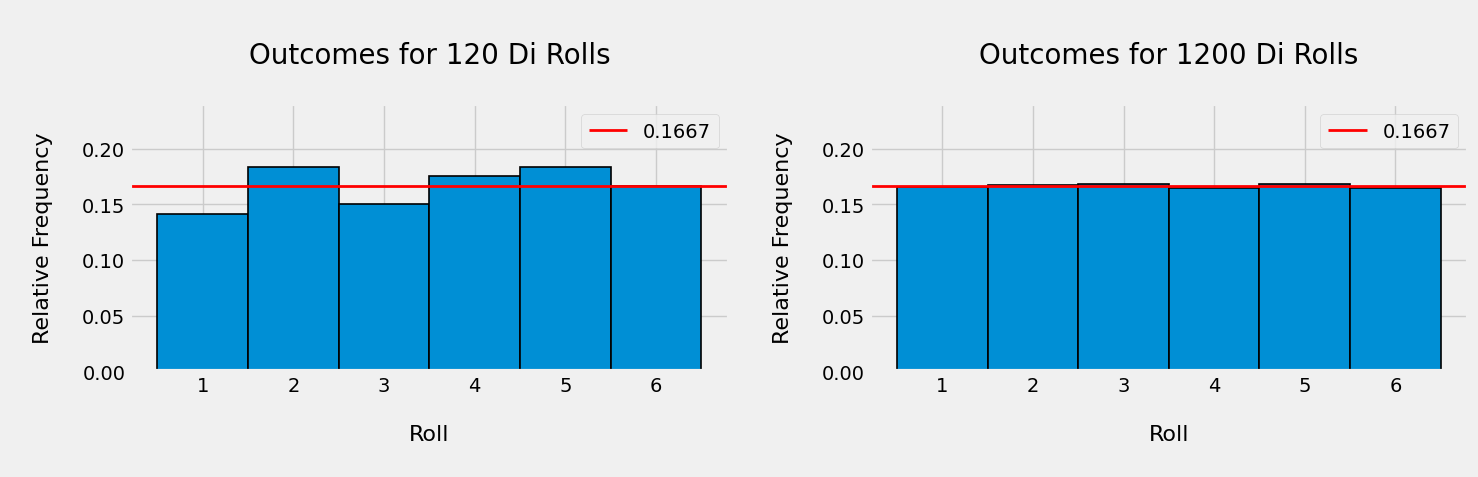

In [47]:
fig, ax = plt.subplots(ncols=2, figsize=(15,5))

data_100 = np.concatenate([np.ones(17), 2*np.ones(22), 3*np.ones(18), 4*np.ones(21), 5*np.ones(22), 6*np.ones(20)])
data_1000 = np.concatenate([np.ones(199), 2*np.ones(201), 3*np.ones(202), 4*np.ones(198), 5*np.ones(202), 6*np.ones(198)])

for i, data in enumerate([data_100, data_1000]):
    ax[i].set_title(f'\nOutcomes for {len(data)} Di Rolls\n', fontsize=20)
    ax[i].hist(data, bins=[0.5, 1.5, 2.5, 3.5 ,4.5 ,5.5 ,6.5], density=True, linewidth=1.2, edgecolor='black')
    ax[i].set_xlabel('\nRoll\n', fontsize=16)
    ax[i].set_ylabel('\nRelative Frequency\n', fontsize=16)
    ax[i].axhline(y=0.1666666, color='red', linewidth=2, label='0.1667')
    ax[i].legend()
    ax[i].set_ylim(0,0.24)

fig.tight_layout()

### 2.2 - Plotting Histograms for Continuous Random Variables

Plotting histograms for continuous random variables is relatively straightforward: group the data into bins and plot bars where the **area** of each bar represents the number of measurements that fall into that bin. Again, to compare histograms with different numbers of measurements, the area should be equal to the relative frequency of the measurements and not the frequency alone. Unlike discrete random variables (where the bin size is fixed), the bin size for continuous random variables can be chosen to take any value. This is an important property that will be used in the next section. An example of histograms for people's heights are shown below. The first trial uses a sample of 1000 people, and the second trial uses a sample size of 25,000 people. As the number of people in the trial increases, the distribution appears to tend towards a bell-curve shape, with most people recording a height near the mean, and a small number of very tall and very short people existing at the extremes. This distribution is called a *Normal Distribution* and is covered in greater depth in *Distributions in Data*.

&nbsp;


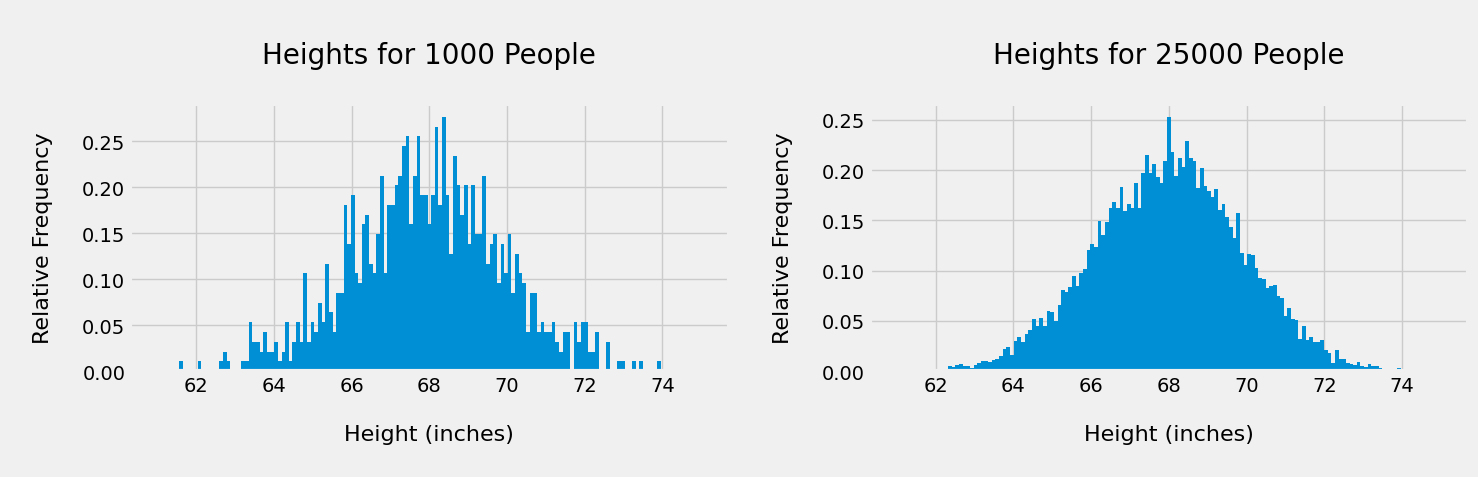

In [51]:
fig, ax = plt.subplots(ncols=2, figsize=(15,5))

for i, data in enumerate([np.random.choice(heights, 1000), np.random.choice(heights, 25000)]):
    ax[i].set_title(f'\nHeights for {len(data)} People\n', fontsize=20)
    ax[i].hist(data, bins=np.linspace(61,75,150), density=True)
    ax[i].set_xlabel('\nHeight (inches)\n', fontsize=16)
    ax[i].set_ylabel('\nRelative Frequency\n', fontsize=16)
fig.tight_layout()

### 2.3 - Measuring Skew 

Histograms are a useful way to determine if a dataset is skewed. **Skew** describes the shape of a distribution: whether the data is concentrated on the right-hand side or the left-hand side. Data without skew is said to be **symmetric**. An example of a symmetric dataset is shown above in the distribution of heights.

Skew can be determined mathematically using a simple calcuation. If the difference between the median and lower quartile is less than the difference between the upper quartile and the median, then the data is **right-skewed** (also called positive skew). If the inverse is true, then the data is **left-skewed** (also called negative skew). If the two differences are equal, then the data is symmetric. This can be summarised mathematically:

&nbsp;

$\begin{align}
\text{Skew}\begin{cases} 
   Q_2 - Q_1 < Q_4 - Q_3 & \text{Positive Skew (Right Skew)} \\
   Q_2 - Q_1 = Q_4 - Q_3 & \text{Symmetric} \\
   Q_2 - Q_1 > Q_4 - Q_3 & \text{Negative Skew (Left Skew)}
\end{cases}
\end{align}$

&nbsp;

An example of 3 types of skewed data is shown below:

&nbsp;


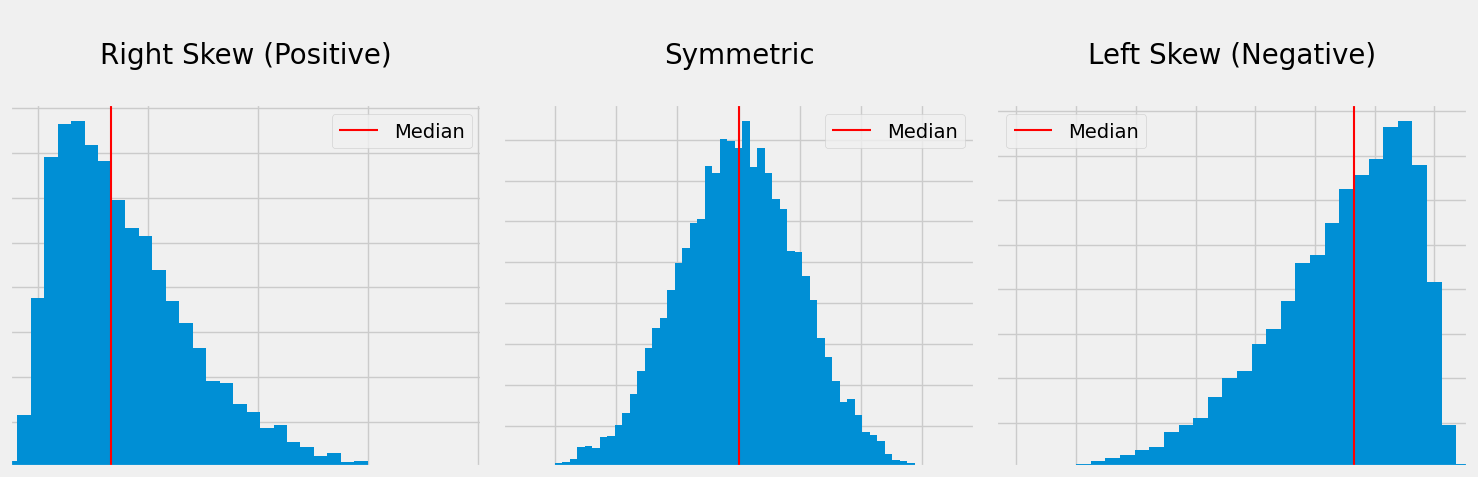

In [5]:
right_data = st.skewnorm.rvs(10, size=10000)
symmetric_data = st.skewnorm.rvs(0, size=10000)
left_data = st.skewnorm.rvs(-10, size=10000)

fig, ax = plt.subplots(ncols=3, figsize=(15,5))
for i, data in enumerate([right_data, symmetric_data, left_data]):
    ax[i].hist(data, bins=np.linspace(-3,3,50), density=True)
    ax[i].set_xticklabels([])
    ax[i].set_yticklabels([])
    ax[i].set_xlim([min(data), max(data)])
    ax[i].axvline(x=np.median(data), color='r', linewidth=1.5, label='Median')
    ax[i].legend()

ax[0].set_title(f'\nRight Skew (Positive)\n', fontsize=20)
ax[1].set_title(f'\nSymmetric\n', fontsize=20)
ax[2].set_title(f'\nLeft Skew (Negative)\n', fontsize=20)

fig.tight_layout()

### 2.4 - Probabilities for Random Variables

Histograms can be used to **estimate** the probabilty of making an observation within a range of values. Probabilities are denoted by *P* (for *probability*), followed by parentheses which describe the probability that is being represented. When working with random variables, the capital letter denoting the variable is also included in the parentheses to show which variable is being described.

For example, consider the random variable *H* which is the height of a person in the population shown above. If a person was randomly chosen from the dataset, the probability their between 68 and 69 inches can be written as:

&nbsp;

$\begin{align}
P(\text{68 < H < 69})
\end{align}$

&nbsp;

Another notation is commonly used to abbreviate the case $P(X = x)$, where $x$ is some particular value in the sample space. The short-hand for this is uses a lowercase $p$:

$\begin{align}
p(x)
\end{align}$

&nbsp;

Note that histograms are constructed from a finite number of samples, and so the measurements may not be perfectly representative of the random variable. For this reason, any probability value calculated using a histogram is an estimate.

&nbsp;


### 2.5 - Estimating Probabilities for Discrete Random Variables using Histograms

Consider the di roll example to be governed by a random variable, $D$. The relative frequency histogram generated using 1200 rolls can be used to make an estimation for the probability $p(x_i)$ for each outcome in the sample space. The relative frequency of each bar is equal to the probability for each outcome occurring. Hence, the *y*-axis label can be replaced with *probability*. It then follows that the relative frequency histogram shows a **probability distribution** for the random variable, with the resulting graph called a **probability histogram**.

With this in mind, it becomes trivial to solve probability questions. For example, the probability that the di lands on a 4 is equal to the bar height at $D = 4$. In mathematical notation, this can be written as:

&nbsp;

$\begin{align}
P(D = 4) = p(4) = \frac{198}{1200} = 0.165 = 16.5\text{\%}
\end{align}$

&nbsp;

To calculate the probability that the roll of the di is less than or equal to 3, sum the probabilities (heights) of the outcomes that are less than or equal to 3:

&nbsp;

$\begin{align}
P(D \leq 3) = p(1) + p(2) + p(3) = \frac{119}{1200} + \frac{201}{1200} + \frac{202}{1200} = 0.502 = 50.2\text{\%}
\end{align}$

&nbsp;

The histogram for each of these examples is shown below, with the bars used in calculations highlighted in red.

&nbsp;



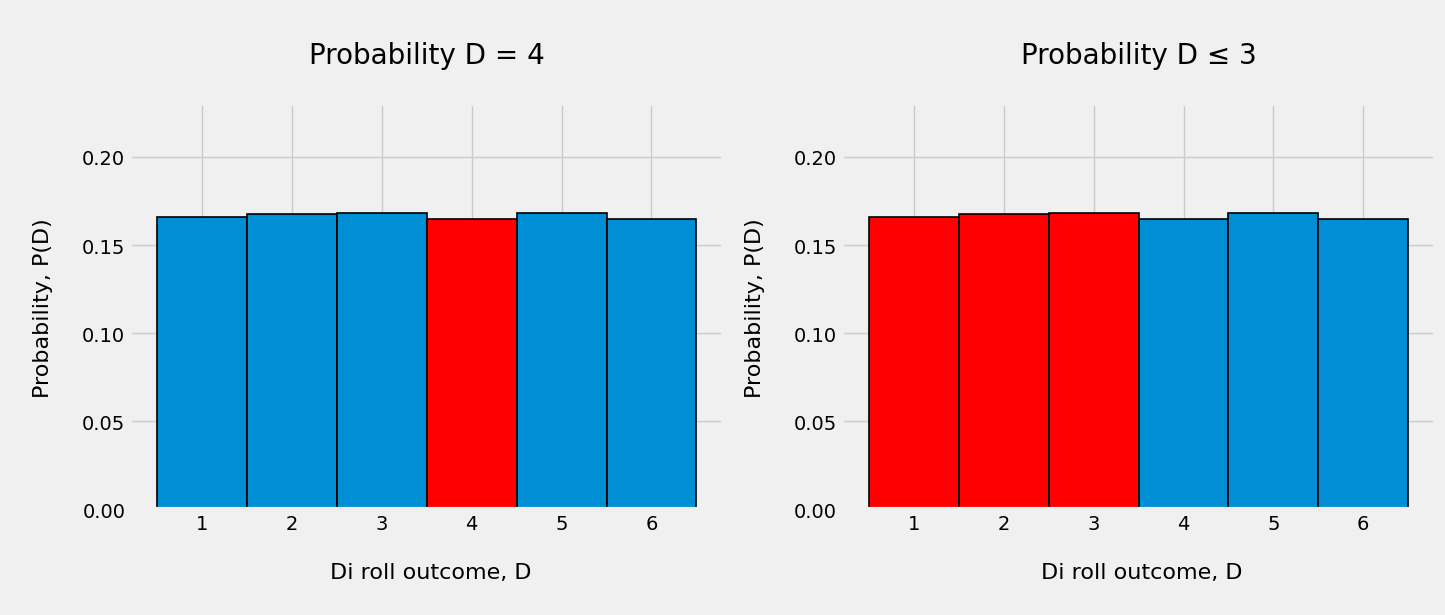

In [52]:
fig, ax = plt.subplots(ncols=2, figsize=(15,5))
data_1000 = np.concatenate([np.ones(199), 2*np.ones(201), 3*np.ones(202), 4*np.ones(198), 5*np.ones(202), 6*np.ones(198)])

ax[0].set_title('\nProbability D = 4\n', fontsize=20)
ax[1].set_title(u'\nProbability D \u2264 3\n', fontsize=20)

for i in range(2):
    N, bins, patches = ax[i].hist(data_1000,
                                  bins=[0.5, 1.5, 2.5, 3.5 ,4.5 ,5.5 ,6.5], 
                                  density=True, 
                                  linewidth=1.2, 
                                  edgecolor='black')
    ax[i].set_xlabel('\n Di roll outcome, D\n', fontsize=16)
    ax[i].set_ylabel('\nProbability, P(D)\n', fontsize=16)
    ax[i].set_ylim(0,0.23)

    if i == 0:
        patches[3].set_facecolor('r')
    else:
        for bin_num in range(3):
            patches[bin_num].set_facecolor('r')



### 2.6 - Estimating Probabilities for Continuous Random Variables using Histograms

Calculating probabilities for continuous random variables is very similar to calculating probabilities for discrete random variables, with two key differences:

* the height of the bars is the probability density, not the probability
* the probability of a continuous random variable taking an exact value is zero

&nbsp;

Recall the reason for histograms being used for continuous data instead of bar charts. Discrete data can only take specific values and so can be represented with a bar chart, where the bars show the frequency of each possible outcome. For continuous data the number of possible outcomes is infinite, and so a bar chart is no longer appropriate. Instead, a histogram is used to group subsets of possible values into bins. Histograms for continuous data represent the probability of an outcome as the **area** of the relevent bars. For this reason, the height of the bar is no longer the probability but a quantity called the **probability density**. The name is a reference to the similarity between

&nbsp;

$\begin{align}
\text{probability density} \times \text{class width(s)} = \text{probability}
\end{align}$ 

<p align="center">and</p> 

$\begin{align}
\text{density} \times \text{volume} = \text{mass}
\end{align}$

&nbsp;

When finding the probability that a variable takes a specific value, the area of the bar is 0, and so this clearly shows that the probability is 0. This may feel counter-intuitive at first, but consider the following example. There are infinitiely many possible heights between 64 and 74 inches (the range of this dataset). The probability that someone is **exactly** 68 inches is 0. Someone may be 68.0000000001 inches or 67.99999999 inches, and with a precise enough measuring device there may be even more decimal place than shown here. The key point is that for someone to take an exact value to an infinite number of decimal places is infinitely unlikely. For this reason, probabilities with continuous random variables always take the form of an inequality: 

&nbsp;

$\begin{align}
P(H < h)
\end{align}$
$\begin{align}
P(H > h)
\end{align}$
$\begin{align}
P(h_1 < H < h_2)
\end{align}$

&nbsp;

Note that $\leq$ and $\geq$ have the same meaning as $<$ and $>$ since the equality portion does not contribute to the probability. An example is shown below for the probability that a height is measured between 68 and 69 inches, and that a height is measured below 70 inches. The sum is analogous to discrete random variables, simply add the areas of the relevent bars this time instead of the heights.

&nbsp;


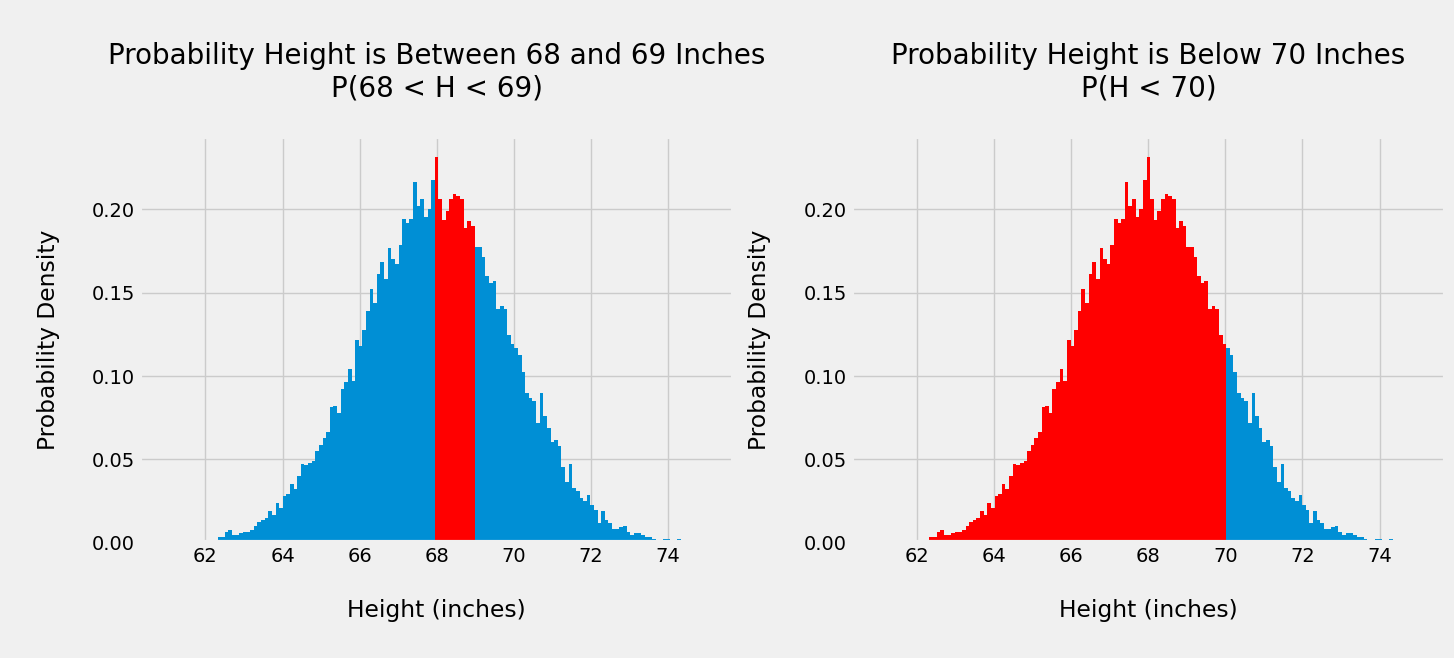

In [7]:
fig, ax = plt.subplots(ncols=2, figsize=(15,5))

ax[0].set_title('\nProbability Height is Between 68 and 69 Inches\nP(68 < H < 69)\n', fontsize=20)
ax[1].set_title('\nProbability Height is Below 70 Inches\nP(H < 70)\n', fontsize=20)

for i in range(2):
    ax[i].set_xlabel('\nHeight (inches)\n')
    ax[i].set_ylabel('\nProbability Density\n')

    N, bins, patches = ax[i].hist(heights, bins=np.linspace(61,75,150), density=True)

    if i == 0 :
        for bin_num in range(74,85):
            patches[bin_num].set_facecolor('r')
    else:
        for bin_num in range(96):
            patches[bin_num].set_facecolor('r')

<center><h2>Section 3 - Probability Mass Functions</h2></center>

### 3.1 - Probability Mass Functions

A **probability mass function** (PMF) defines the true probability of each outcome in the sample space of a discrete random variable. This is similar to the probability histogram shown in the previous section, but is independent of how many measurements of a variable have been made. In general histograms show measurements that have been taken, and can be used to make approximations for the actual probability distribution of a variable. PMFs however show the true probability values for each outcome, and are what the histograms attempt to approximate. In a PMF plot, the probability values are indicated with points rather than bars, with the height of each point corresponding to the probability value on the *y*-axis. The term *mass* refers to the fact that the *y*-axis contains the probability values directly. In the $\text{density} \times \text{volume} = \text{mass}$ analogy, the height of the point shows the probability which is analogous to the *mass* term. A key property of PMFs is that the sum of the heights for every point is equal to 1. Noting that a PMF can be written as $f(x)$, it can be summarised that:

&nbsp;

$\begin{align}
\sum_{i=1}^{n}f(x_i) = \sum_{i=1}^{n}P(X=x_i) = \sum_{i=1}^{n}p(x_i) = 1
\end{align}$

&nbsp;

The probability mass functions for two dice are shown below. The first (left) shows a fair di, where each face has an equal probability of showing. Since there are 6 possible outcomes, and the sum of the probabilities must equal 1, the probability for each outcome is $\frac{1}{6} = 0.1667 = 16.67\text{\%}.$ The second graph (right) shows a biased di which is three times as likely to roll a 6 than any other number. That is, the probability distribution is given as:

&nbsp;

$\begin{align}f(d) = \begin{cases}
\frac{1}{8}, & \text{d = 1, 2, 3, 4, 5} \\   
\frac{3}{8}, & \text{d = 6}
\end{cases}\end{align}$

&nbsp;

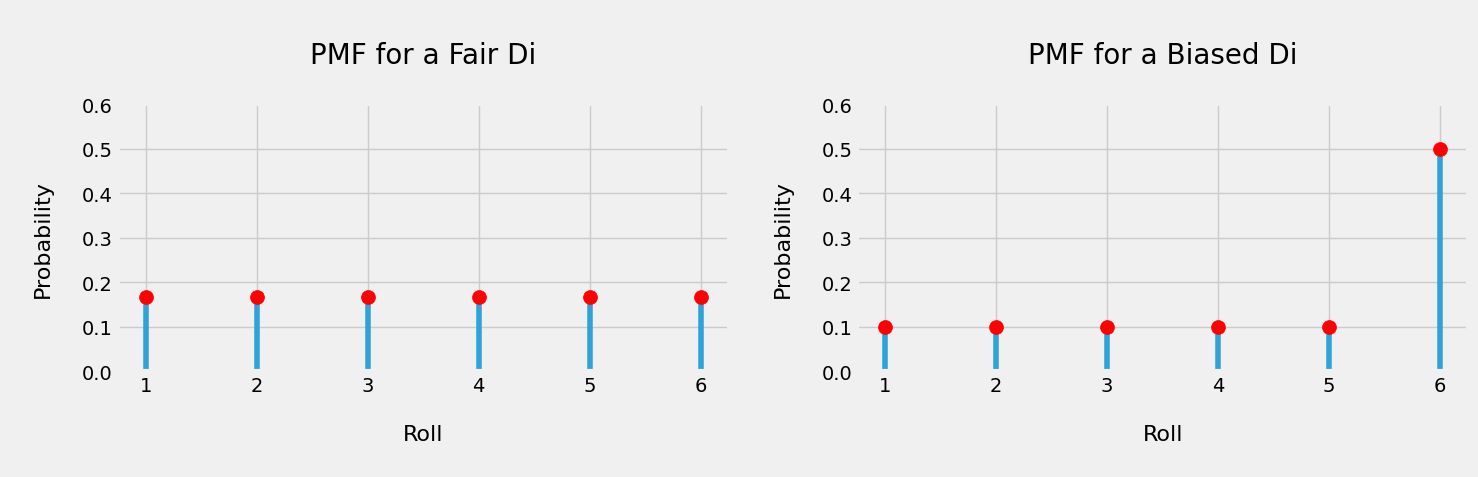

In [8]:
x_data = [1,2,3,4,5,6]
fair_di_data = [1/6,1/6,1/6,1/6,1/6,1/6]
biased_di_data = [1/10,1/10,1/10,1/10,1/10,5/10]

fig, ax = plt.subplots(ncols=2, figsize=(15,5))

for i, data in enumerate([fair_di_data, biased_di_data]):
    ax[i].set_ylim(0,0.6)
    ax[i].set_xlabel('\nRoll\n', fontsize=16)
    ax[i].set_ylabel('\nProbability\n', fontsize=16)

    ax[i].scatter(x_data, data, s=100, color='r', zorder=2)
    for num, point in enumerate(data):
        ax[i].plot([num+1, num+1], [0, point], color='#30a2da', zorder=1)

ax[0].set_title('\nPMF for a Fair Di\n', fontsize=20)
ax[1].set_title('\nPMF for a Biased Di\n', fontsize=20)

fig.tight_layout()

### 3.2 - Discrete Probability Distributions in Tables

The probability mass function can be written in a tabular form since there are a discrete number of values. Each possible value in the sample space is written across the top of the table, with the corresponding value of $p(x)$ written below. The tabular form is useful when the $p(x)$ cannot easily be read from the *y*-axis of the PMF graph. The PMFs for the fair and biased dice are shown below:

&nbsp;

<center><strong>Fair Di:</strong></center>

&nbsp;

|    d   |  1  |  2  |  3  |  4  |  5  |  6  |
|:------:|:---:|:---:|:---:|:---:|:---:|:---:|
|  f(d)  | 1/6 | 1/6 | 1/6 | 1/6 | 1/6 | 1/6 |

&nbsp;

&nbsp;

<center><strong>Biased Di:</strong></center>

&nbsp;
|    d   |  1  |  2  |  3  |  4  |  5  |  6  |
|:------:|:---:|:---:|:---:|:---:|:---:|:---:|
|  f(d)  | 1/8 | 1/8 | 1/8 | 1/8 | 1/8 | 3/8 |

&nbsp;

<style>
  table {
    margin-left: auto;
    margin-right: auto;
  }
</style>

### 3.3 Calculating Probability Using Probability Mass Functions

Probability values should be calculated using PMFs rather than probability histograms if the PMF is known. This is because the probability histograms give an estimate of what the true probabilities are. The method of calculating probabilities however is exactly the same: add the relevent probability values as necessary. For example, the probability of the biased di rolling a number that is not 6 is given by:

&nbsp;

$\begin{align}
P(d < 6) = p(1) + p(2) + p(3) + p(4) + p(5) = \frac{1}{8} + \frac{1}{8} + \frac{1}{8} + \frac{1}{8} + \frac{1}{8} = \frac{5}{8}
\end{align}$

&nbsp;

Note, for calculations such as this where only one possibility is rejected (that is, all probabilities are summed except for $p(6)$), is it easier to subtract the probabilities that are **not** of interest from 1:

&nbsp;

$\begin{align}
P(d < 6) = 1 - p(6) = 1 - \frac{3}{8} = \frac{5}{8}
\end{align}$

&nbsp;

### 3.4 - Expected Value of Discrete Random Variables

The **expected value** of a random variable (also called the *expectation* or *first moment*) is the theoretical average value that measurements should tend to. Experiments give measurements of a random variable and can be plot using histograms to visuaulise the frequency distribution. The central value of the histogram is the mean, which is calculated based on the data that has been observed in measurements. The probability mass function shows the true probability values for each outcome in the sample space, and has an expected value which is the *true* mean the the mean of the measurements is expected to converge to. Since the expected value is an average it can also be written using $\mu$. Mathematically, the expected value of a discrete random variable is defined as:

&nbsp;

$\begin{align}
E(X) = \mu = \sum_{i=1}^{n} x_ip(x_i) = \sum_{i=1}^{n} x_ip(x_i)
\end{align}$

&nbsp;

For a fair di, the expected value is given by:

&nbsp;

$\begin{align}
E(X) = \mu = \sum_{i=1}^{n} d_ip(d_i) = 1(\frac{1}{6}) + 2(\frac{1}{6}) + 3(\frac{1}{6}) + 4(\frac{1}{6}) + 5(\frac{1}{6}) + 6(\frac{1}{6}) = 3.5
\end{align}$

&nbsp;

Of course 3.5 is not a value that can be rolled on a di. However, if a fair di is rolled many times and the mean of all the values is taken, the mean can be expected to equal 3.5. For a small number of rolls the mean of the measurements may be quite different to 3.5, but as the number of measurements increase the mean will converge to the expected value.

&nbsp;

For the biased di, the expected value is given by:

&nbsp;

$\begin{align}
E(X) = \mu = \sum_{i=1}^{n} d_ip(d_i) = 1(\frac{1}{8}) + 2(\frac{1}{8}) + 3(\frac{1}{8}) + 4(\frac{1}{8}) + 5(\frac{1}{8}) + 6(\frac{3}{8}) = 4.125
\end{align}$

&nbsp;

The expected value for the biased di is higher than a fair di, which is expected as the highest value (6) is more likely to appear.

&nbsp;

### 3.5 - Expected Values of $X^n$ for Discrete Random Variables

Often the expected value of a random variable squared or cubed etc needs to be found (such as in calculating the variance of a random variable which is shown in the next cell), and so a general formula for $E(X^n)$ is very useful. This formula is straightforward to derive, and is the sum of each of the outcomes to the *n* th power multiplied by the probability of that outcome occurring. This can be written as:

&nbsp;

$\begin{align}
E(X^n) = \sum_{i=1}^{n} x_i^n P(X = x_i) = \sum_{i=1}^{n} x_i^n p(x_i)
\end{align}$

&nbsp;

Note that by following this formula, $E(X^2)$ is not equal to $E(X)^2$. 

&nbsp;


### 3.6 - Variance of a Discrete Random Variable

In the same way that the expected value of a random variable is the *true* average the mean of the measurements will converge to, the expected variance is the value the variance of the measurements will converge to. The formula for the variance of a random variable is given as:

&nbsp;

$\begin{align}
Var(X) = E(X^2) - E(X)^2
\end{align}$

&nbsp;

This can be proven mathematically as shown below:

&nbsp;

**Step 1)** Recall the definition of variance

The variance is the average of the squared difference between each data point and the mean. Written in terms of expected values, each instance of *mean* or *average* can be replaced with *expected value*. Hence, the variance can be expressed as the expected value of, $X$ minus the the expected value of $X$ all squared:

&nbsp;

$\begin{align}
Var(X) = \frac{1}{n}\sum  \limits _{i=1}^{n} (x_i - \mu)^2 = E( (X-E(X)^2) )
\end{align}$

&nbsp;

**Step 2)** Expand the terms inside the parentheses

The terms inside the parentheses can be expanded and manipulated algebraically.

&nbsp;

$\begin{align}
Var(X) = E(X^2 - 2XE(X) + E(X)^2)
\end{align}$

&nbsp;

**Step 3)** Separate the terms

Because of the *linearity* property of expected values, linear combinations can be separated as follows: $E(aX + b) = aE(X) + b$, where $a$ and $b$ are constants. This means that the terms inside the parentheses can be separated:

&nbsp;

$\begin{align}
Var(X) = E(X^2) - E(2XE(X)) + E(E(X)^2)
\end{align}$

&nbsp;

**Step 4)** Simplify the expression

Note that $E(X)$ itself is a constant, and so taking the expectation of a constant does not change the constant's value. Using this fact, it becomes clearer that the final term $E(E(X)^2)$ simplifies to E(X)^2, which is a constant. The middle term is an expectation of a constant, 2, multiplied by a variable, $X$, multiplied by another constant $E(X)$. These constant can be taken outside of the expectation using the property of linearity, giving $2E(X)$ multiplied by $E(X)$. Combining these results gives $2E(X)^2$, which can easily be calculating using the formula given in the cell above.

&nbsp;

$\begin{align}
Var(X) = E(X^2) - 2E(X)^2 + E(X)^2
\end{align}$

&nbsp;

**Step 5)** Collect like terms

Finally collect the terms in $E(X)^2$ to obtain the result given at the beginning of this cell.


&nbsp;

$\begin{align}
Var(X) = E(X^2) - E(X)^2
\end{align}$

&nbsp;

A list of properties of expectations can be found here [1] in an Introduction to Probability and Simulation by Kevin Ross.

&nbsp;

<center><h2>Section 4 - Probability Density Functions</h2></center>

### 4.1 - Density Curves

The previous sections show that histograms can be useful for presenting the distribution of data for both discrete and continuous random variables. For discrete random variables, the bin size is fixed and is determined by the midpoints of possible outcomes on the *x*-axis. For continuous random variables however, the bin-size can be changed to any value that best represents the data. The plots below show the same measurements 25,000 heights, but use a different number of bins to display the data. As the number of bins increases, the data appears to approach a bell-shape as briefly stated earlier in the notebook. Different data may approach different shapes, but the key point here is that as the number of bins tends to infinity, the distribution tends towards a particular shape. These shapes can be represented using smooth curves, called **density curves**.

&nbsp;


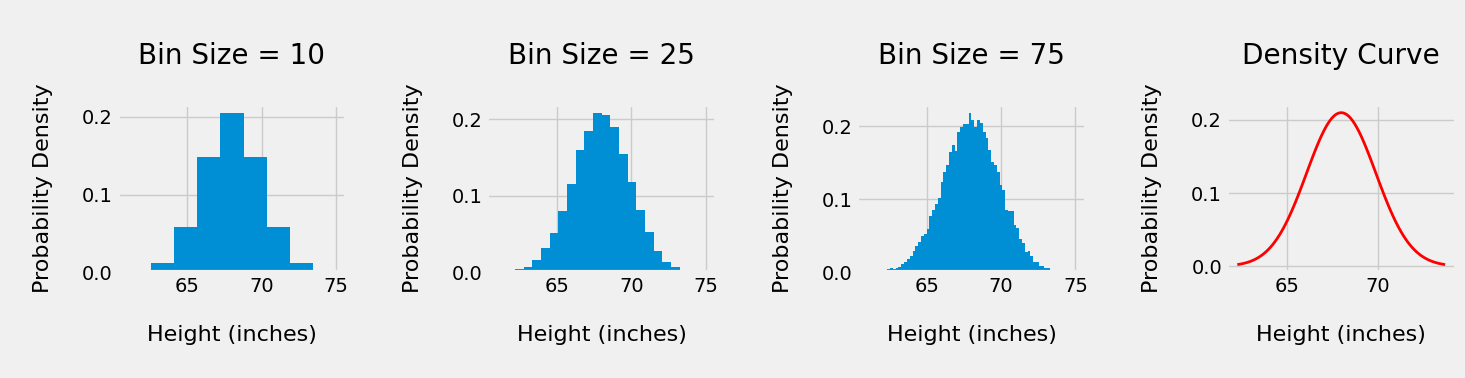

In [9]:
fig, ax = plt.subplots(ncols=4, figsize=(15,4))

for i, bin in enumerate([10,25,75]):
    ax[i].set_title(f'\nBin Size = {bin}\n', fontsize=20)
    ax[i].hist(heights, bins=np.linspace(61,75,bin), density=True)

for i in range(4):
    ax[i].set_xlabel('\nHeight (inches)\n', fontsize=16)
    ax[i].set_ylabel('\nProbability Density\n', fontsize=16)

mu = np.mean(heights)
sigma = np.std(heights)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
ax[3].plot(x, st.norm.pdf(x, mu, sigma), color='r', linewidth=2)
ax[3].set_title('\nDensity Curve\n')

fig.tight_layout()

### 4.2 - Probability Density Functions

Just as probability mass functions show the true probability distribution for discrete random variables, **probability density functions** (PDFs) show the true probability distribution for continuous random variables. Density curves are used to show the probability density for each value in the sample space. Since the sample space contains infinitely many possible values, the corresponding probability density values can be connected using a smooth curve, rather than being represented by distinct points as in the discrete case.

&nbsp;

PDFs have two key properties:

* the total area under the curve is equal to 1
* the curve can only ever be > 0

&nbsp;

Recall that density curves represent the probability histograms shown earlier in the notebook. The area of bars were used to calculate the probability of observing certain outcomes, which gave rise to the term probability *density*. This property of area equalling probability persists with the density curve representation, and so the total area underneath the curve gives the sum of all possible outcomes. The total probability of all outcomes is 1 (100%), and so the area under the curve must also be equal to 1. Additionally, the curve cannot give negative probability values, and so the PDF must not fall below $y$ = 0. Mathematically, the PDF for a random variable $X$ can be written as $f(x)$, and so these properties can be summarised as:

$\begin{align}
\int_{-\infty}^{\infty}f(x)dx = 1
\end{align}$

$\begin{align}
f(x) \geq 0
\end{align}$

### 4.3 - Visualising Probability Density Functions

It can be helpful to see a probability density function overlaid on a probability histogram. This notebook has used the example of the heights of individuals in a group of 25,000 people. The graph below shows that the probability histogram of the heights measured roughly forms a Normal distribution as mentioned earlier, but of course the match is not perfect. The idea here is to remember the difference between a PDF and a probability histogram:

> A probability histogram shows the probabilities of certain measurements in a sample of measurements. A probability density function shows the true probabilities of each value occuring for a continuous random variable, and is what the probability histogram attempts to approximate.

It can be expected that with more and more heights measured, e.g 10,000 or 1 million, the shape of the probability histogram will become closer and closer to the PDF for a Normal distribution. Not every distribution will have the bell-curve shape of the Normal distribution, and so the PDF will look different for different distributions. However the idea remains the same: the PDF shows the true probability values for all outcomes in the sample space, and is not always known - this is why probability histograms can be used to approximate it.

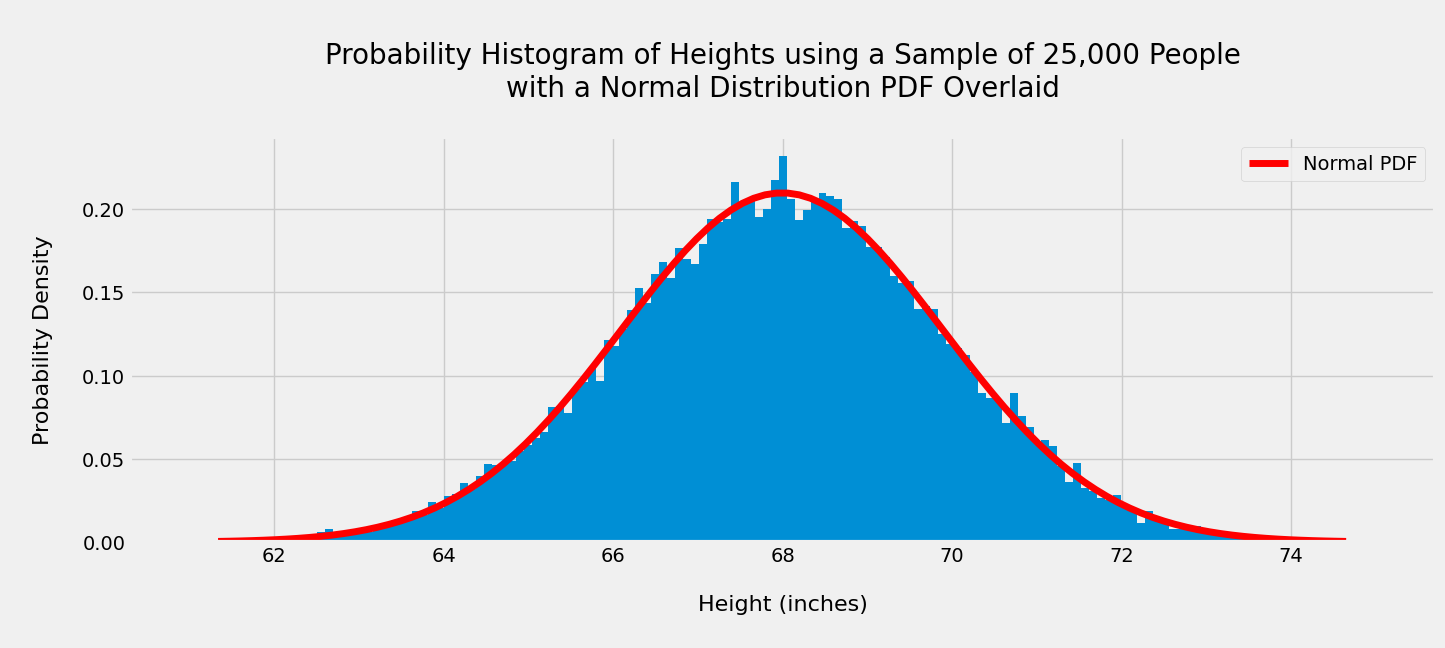

In [10]:
mu = np.mean(heights)
sigma = np.std(heights)
x = np.linspace(mu - 3.5*sigma, mu + 3.5*sigma, 100)

fig, ax = plt.subplots(figsize=(15,5))

ax.hist(heights, bins=np.linspace(61,75,150), density=True)
ax.plot(x, st.norm.pdf(x, mu, sigma), color='r', linewidth=5, label='Normal PDF')
ax.set_title('\nProbability Histogram of Heights using a Sample of 25,000 People\nwith a Normal Distribution PDF Overlaid\n', fontsize=20)
ax.set_xlabel('\nHeight (inches)\n', fontsize=16)
ax.set_ylabel('\nProbability Density\n', fontsize=16)
ax.legend()

### 4.4 - Calculating Probability Using Probability Density Functions

Probability Mass Functions extend the idea of probability histograms for discrete random variables. In these plots, the heights of the bars of used to represent the probability values, and so the heights of the points in the PMF show the probability values. Probability Density Functions however extend the idea of probability histograms for continuous random variables, where the *area* of the bars represent the probability values. Therefore to calculate probabilities from PDFs, the area should be found under the curve between to points.

For example, the probability that a person in this population has a height between 68 and 69 inches is equal to the area under the curve between $x$ = 66 and $x$ = 68. The probability that a height is greater than 70 inches is equal to the area under the curve for $x$ > 70 to infinity. Mathematically, this can be summarised as:

&nbsp;

$\begin{align}
P(a < X < b) = \int_{a}^{b} f(x) dx
\end{align}$

&nbsp;

Note that the property of $p(x)=0$ for any $x$ holds in the PDF form, just as in the probability histogram form. This is an important concept for continuous variables, since the probability that any continuous random variable is equal to a specific value is 0. 

&nbsp;


Text(70.5, 0.165, 'P(68 < H < 69): 20%')

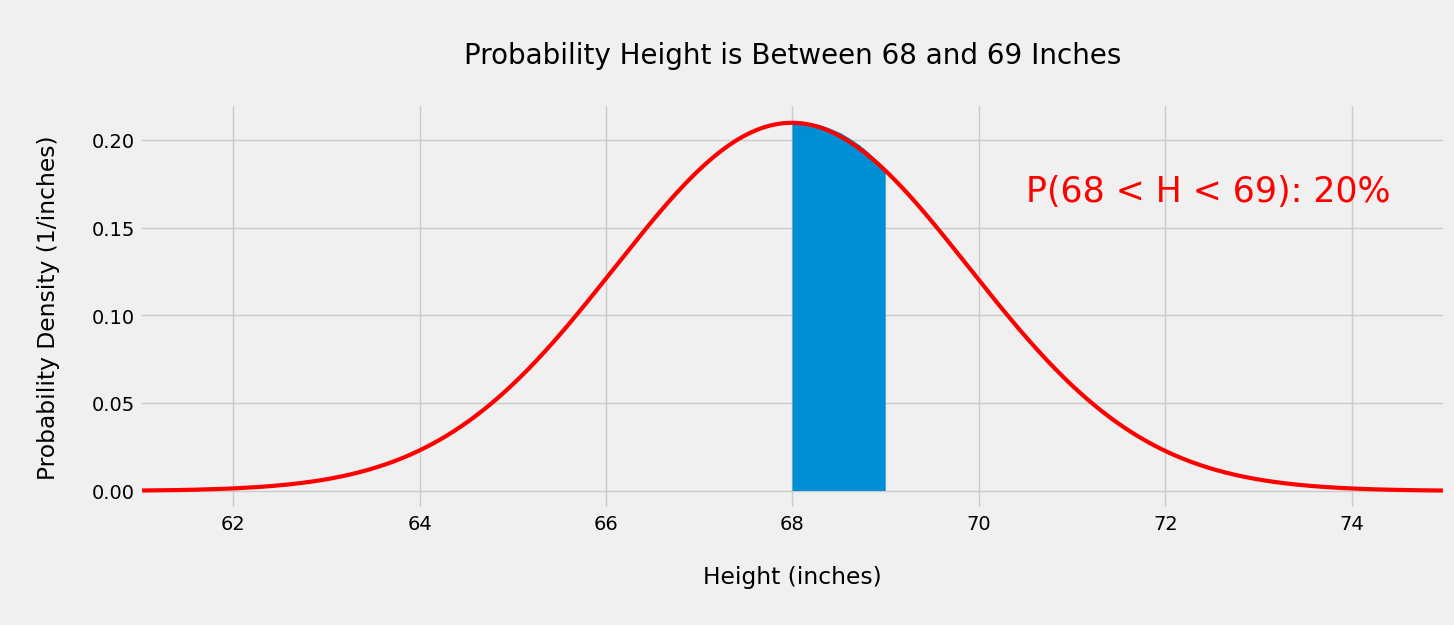

In [11]:
def normal(x_values):
    mu = np.mean(x_values)
    sigma = np.std(x_values)
    return [(1/(sigma*math.sqrt(2*math.pi))) * math.e**(-1*(((x-mu)**2)/(2*(sigma**2)))) for x in x_values]

def height_integrand(x, mu, sigma):
    return (1/(sigma*math.sqrt(2*math.pi))) * math.e**(-1*(((x-mu)**2)/(2*(sigma**2))))
    
# Plot graph
fig, ax =plt.subplots(figsize=(15,5))
ax.set_title('\nProbability Height is Between 68 and 69 Inches\n', fontsize=20)
ax.set_xlabel('\nHeight (inches)\n')
ax.set_ylabel('\nProbability Density (1/inches)\n')
ax.set_xlim(61,75)
ax.plot(heights, normal(heights), color='red', linewidth=3)
x_range = np.linspace(68,69,5500)
ax.fill_between(x_range, normal(heights)[12000:17500])

# Integrate for area under curve
probability = quad(height_integrand, 68, 69, args=(np.mean(heights), np.std(heights)))[0]
ax.annotate(text=f'P(68 < H < 69): {round(probability*100)}%', xy=(70.5,0.165), color='r', fontsize=25)

### 4.5 - Note About Parameteric and Non-Parametric PDFs

In the real world many events follow similar distributions that can be modelled quite easily. For example, the concept of a Normal distribution is so prevalent because it is often the case in nature that measurements of a variable cluster around the mean. There are many other common distributions too. When performing experiments with variables that appear to follow a Normal distribution (or any other distribution with a well-defined mathematical model), it is useful to assume the variable perfectly follows the theoretical distribution. This may not be the case, but a close enough approximation can simplify the statistical techniques used significantly. Any well-defined distribution which uses some parameters to produce a model (e.g. mean and variance in the case of the Normal distribution) is called a *parametric* model. Non-parametric statistical models also exist, and can be used to approximate the PDF for a distribution that does not follow any of the well-defined models used in parametric statistics. One example of these techniques is called *Kernel Density Estimation* which is covered in the notebook with the same name. Most of the time however, it is preferable to use a parametric model as shown in this notebook.

&nbsp;

### 4.6 - Expected Value of Continuous Random Variables

The expected value of a continuous random variable follows the same idea of the expected value for discrete random variables. The expected value is the value that averages of measurements will tend to after many observations. The discrete case has the formula:

&nbsp;

$\begin{align}
E(X) = \sum_{i=1}^{N} x_iP(X = x_i) = \sum_{i=1}^{N} x_ip(x_i)
\end{align}$

&nbsp;

Since the continous case is an extension of the discrete case for more values, it follows that the formula above can be converted into a continuous form. To do this, simply replace the summation operator, $\sum$, with its continuous equivalent, $\int$. The quantities being summed this time are not the heights, but rather the areas of infinitely thin, rectanglular strips under the curve (probability for a value in the sample space) multiplied by the value in the sample space. Mathematically, this is written as $xf(x)dx$, where $x$ is the value in the sample space and $f(x)dx$ is the area of the infinitely thin rectangle, which is equal to the probability of $x$ occuring. This is equivalent to $x_iP(X = x_i)$ in the discrete case. Note that the probability of every value in the sample space must be considered, and so the limits of the integral should run from $-\infty$ to $+\infty$. The continous sum can therefore be written as:

&nbsp;

$\begin{align}
E(X) = \int_{-\infty}^{\infty} xf(x) dx
\end{align}$

&nbsp;

### 4.7 - Expected Values of $X^n$ for Continuous Random Variables

As shown above, the discrete case canbe converted to the continuous domain using integrals rather than summation operators. With this in mind, it becomes trivial to extend the discrete case of $E(X^n)$ to the continuous case:

&nbsp;

$\begin{align}
E(X^n) = \int_{-\infty}^{\infty} x^nf(x) dx
\end{align}$

&nbsp;

&nbsp;


### 4.8 - Variance of a Continuous Random Variable

Finally, the variance of a continuous random variable can also be extended from the formula derived for discrete random variables:

&nbsp;

$\begin{align}
Var(X) = E(X^2) - E(X)^2
\end{align}$

&nbsp;

The $E(X^2)$ term can be written using the formula for $E(X^n)$ shown in the cell above. Next, the $E(X)^2$ term can be rewritten as $\mu^2$. Combining these together gives:

&nbsp;

$\begin{align}
Var(X) = \int_{-\infty}^{\infty} x^nf(x) dx - \mu^2
\end{align}$

&nbsp;


<center><h2>Section 5 - Cumulative Distribution Functions</h2></center>

### 5.1 - Overview of Cumulative Distribution Functions

A **Cumulative Distribution Function** (CDF) shows the accumalting sum of the probability values as the value of $x$ increases through the sample space. Unlike PMFs and PDFs, the name for the CDF is the same for both discrete and continuous random variable, eventhough the functions for each look slightly different. The $x$-axis of a CDF plot shows the possible values in the sample space for the random variable and the $y$ axis shows the accumulated probability at that point. In other words, the $y$-axis shows the value $P(X<x)$ for each value on the $x$-axis. CDFs are denoted by $F(x)$, which is similar to $f(x)$ which denotes PMFs and PDFs. The reason for this similarity is explained later in this section.

&nbsp;

### 5.2 - Discrete Cumulative Distribution Functions

Cumulative Distribution Functions for discrete random variables uses points and lines to show the cummulative probabilities as $x$ increases through the sample space. In the example of a fair di, the probability of a di rolling a 1 is $\frac{1}{6}$. Hence a line is drawn at $y = \frac{1}{6}$. The line begins at $x = 1$ with a coloured circle, and ends at $x = 2$ with a non-coloured circle. This represents the fact the the probability of rolling a value *less than* 2 is $\frac{1}{6}$, not a value that is less than *or equal* to 2. Next, the probability of rolling a 2 is also $\frac{1}{6}$, so a line is drawn at $y = \frac{2}{6}$ beginning at $x = 2$ with a coloured circle, and ending at $x = 3$. This process is repeated for all the values in the sample space until the final probability value is equal to 1 (all values in the sample space have been plot). The CDF for a fair di can be summarised by:

&nbsp;

$\begin{align}\text{F(d) = }\begin{cases}
\frac{1}{6}, & \text{d = 1} \\
\frac{2}{6}, & \text{d = 2} \\   
\frac{3}{6}, & \text{d = 3} \\   
\frac{4}{6}, & \text{d = 4} \\   
\frac{5}{6}, & \text{d = 5} \\   
1, & \text{d = 6} \\   
\end{cases}\end{align}$

&nbsp;

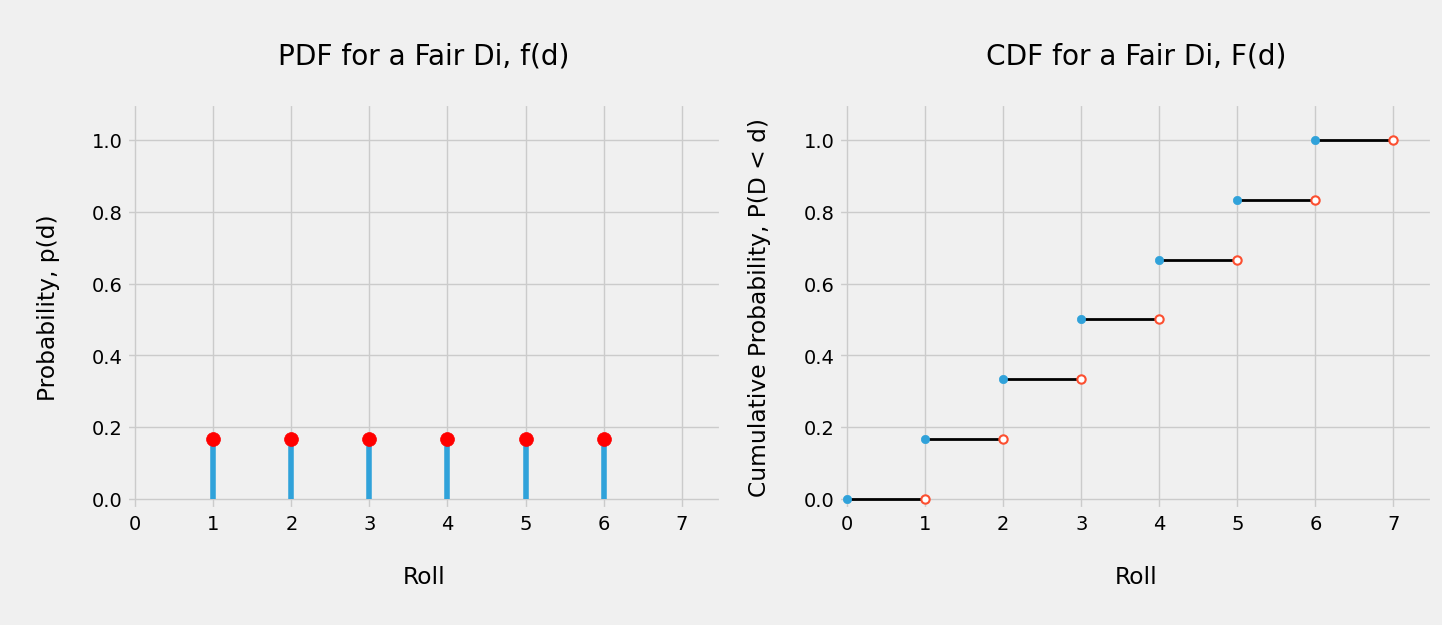

In [12]:
# Create figure
fig, ax = plt.subplots(ncols=2, figsize=(15,5))

for i in range(2):
    ax[i].set_ylim(-0.03,1.1)
    ax[i].set_xlim(-0.1,7.5)
    ax[i].set_xlabel('\nRoll\n')

# PDF plot
ax[0].set_title('\nPDF for a Fair Di, f(d)\n')
ax[0].set_ylabel('\nProbability, p(d)\n')
ax[0].scatter([1,2,3,4,5,6], [1/6,1/6,1/6,1/6,1/6,1/6], s=100, color='r', zorder=2)
for i in range(6):
    ax[0].plot([i+1, i+1], [0, 1/6], color='#30a2da', zorder=1)

# CDF plot
start_points = [(0,0), (1,1/6), (2,2/6), (3,3/6), (4,4/6), (5,5/6), (6,1)]
end_points = [(1,0), (2,1/6), (3,2/6), (4,3/6), (5,4/6), (6,5/6), (7,1)]
ax[1].set_title('\nCDF for a Fair Di, F(d)\n')
ax[1].set_ylabel('\nCumulative Probability, P(D < d)\n')
for i in range(7):
    ax[1].scatter(x=start_points[i][0], y=start_points[i][1], color='#30a2da', zorder=2)
    ax[1].scatter(x=end_points[i][0], y=end_points[i][1], edgecolor='#fc4f30', color='white', linewidth=1.5, zorder=2)
    ax[1].plot([start_points[i][0], end_points[i][0]], [start_points[i][1], start_points[i][1]], linewidth=2, color='black', zorder=1)

### 5.3 - Continuous Cumulative Distribution Functions

Cumulative Distribution Functions for continuous random variables follow the same idea as CDFs for discrete random variables. The axes are identical, but this time the graph shows a continous line instead of discrete jumps in the $y$-axis. Recall the PDF for a population of people's heights which follows a Normal distribution. This has a characteristic *bell-curve* shape, and is shown again below on the left. When this distribution is added cumulatively to obtain the CDF, it forms a characteristic *S-curve* shape. This shows that very little data is measured in the extreme left of the graph, a large proportion of measurements are made around the average, and few measurements are made in the far right of the graph. The gradient of the curve near the middle shows how many measurements are made near the average. If the gradient is high, the measurements are concentrated near the average value. If the gradient is low, the measurements are most widely spread across the distribution.

&nbsp;

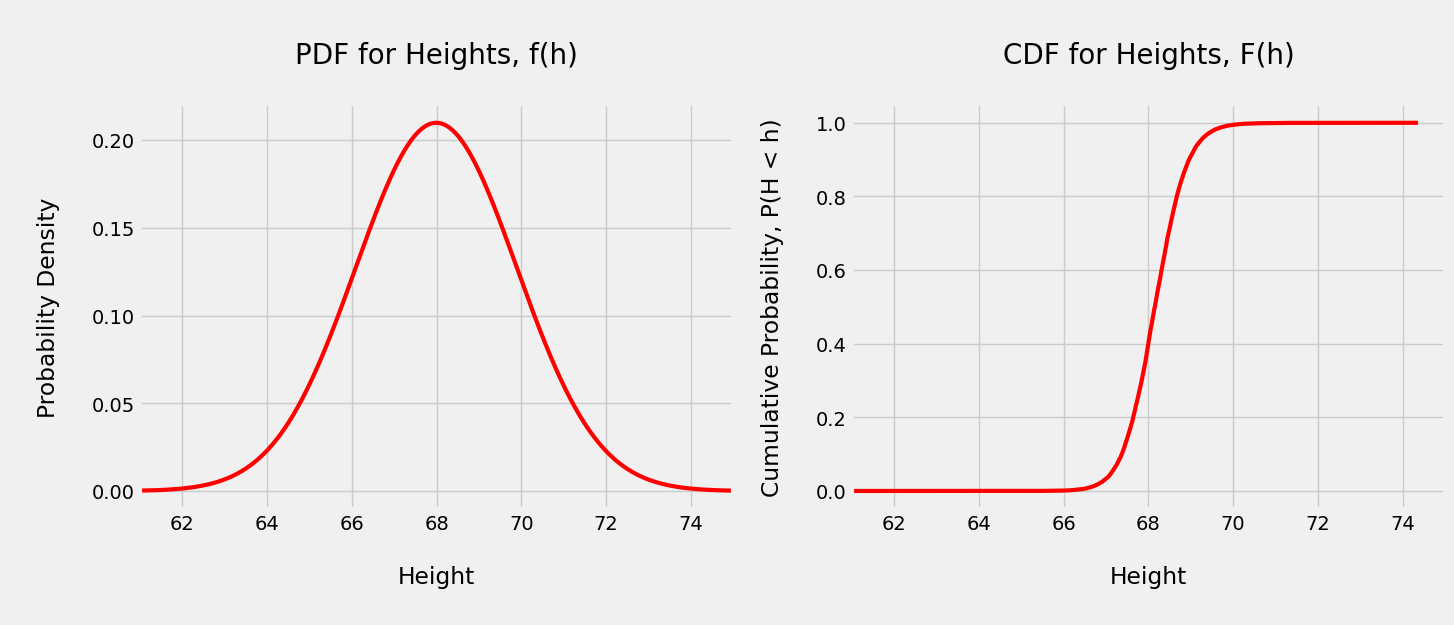

In [13]:
# Create figure
fig, ax = plt.subplots(ncols=2, figsize=(15,5))

for i in range(2):
    ax[i].set_xlim(61,75)
    ax[i].set_xlabel('\nHeight\n')

# PDF Plot
ax[0].set_title('\nPDF for Heights, f(h)\n', fontsize=20)
ax[0].set_ylabel('\nProbability Density\n')
ax[0].plot(heights, normal(heights), color='red', linewidth=3)

# CDF Plot
x_values = np.linspace(60,75, len(heights[::10]))
cumulative = [quad(height_integrand, 60, x, args=(np.mean(heights), np.std(heights)))[0] for x in x_values]
ax[1].set_title('\nCDF for Heights, F(h)\n', fontsize=20)
ax[1].set_ylabel('\nCumulative Probability, P(H < h)\n')
ax[1].plot(heights[::10], cumulative, color='red', linewidth=3)


### 5.4 - Relationship Between PDFs and CDFs

The PDF and CMF for a random variable are related since the CDF is found by taking the cumulative sum under the PDF curve. The notation for the two are therefore similar to represent this connection. The cumulative sum can easily be expressed using calculus as the integral of the PDF, hence the following definition:

&nbsp;

$
CDF = \int PDF
$

&nbsp;

$
F(x) = \int_{-\infty}^{\infty} f(x) dx
$

&nbsp;

### 5.5 - Finding Modes, Medians, Quartiles and Percentiles

The modal value of a random variable can easily be found by reading the value on the $x$-axis that corresponds to the highest peak in a PMF or PDF. For example, in the heights exmaple the heighest peak in probability density occurs when $h$ is around 68 inches on the $x$-axis. For a uniform distribution, such as in the di roll example, there is no single modal value since all the rolls are equally likely. 

Medians, quartiles and percentiles can be found using the CDF. The value for each quartile (0.25, 0.5, and 0.75 respectively) can be read directly from the graph. For example, the CDF of the heights example from earlier is shown below. To find any quartile, or even percentile, locate the decimal value on the $y$-axis (e.g. 0.25 for lower quartile) and drawn a line across to touch the curve. Draw a second line directly downwards to meet the $x$-axis and read off the value. This is shown below for the lower quartile, median, and upper quartile. For Normal distributions, the mode is equal to the median, but this is not necessarily true of other distributions.

&nbsp;

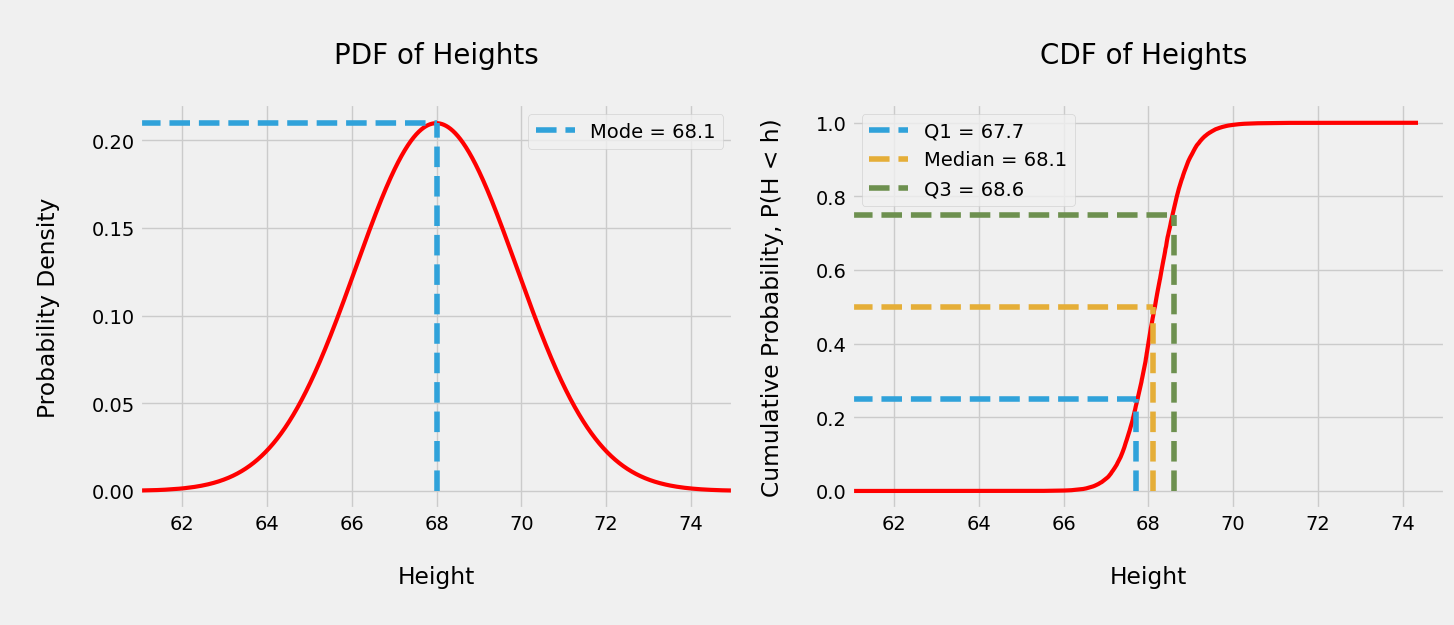

In [46]:
# Create figure
fig, ax = plt.subplots(ncols=2, figsize=(15,5))

for i in range(2):
    ax[i].set_xlim(61,75)
    ax[i].set_xlabel('\nHeight\n')

# PDF Plot
ax[0].set_title('\nPDF of Heights\n', fontsize=20)
ax[0].set_ylabel('\nProbability Density\n')
ax[0].plot(heights, normal(heights), color='red', linewidth=3)
ax[0].plot([61,68], [0.21,0.21], linestyle='--', color='#30a2da', label='Mode = 68.1')
ax[0].plot([68,68], [0,0.21], linestyle='--', color='#30a2da')
ax[0].legend()

# CDF Plot
x_values = np.linspace(60,75, len(heights[::10]))
cumulative = [quad(height_integrand, 60, x, args=(np.mean(heights), np.std(heights)))[0] for x in x_values]
ax[1].set_title('\nCDF of Heights \n', fontsize=20)
ax[1].set_ylabel('\nCumulative Probability, P(H < h)\n')
ax[1].plot(heights[::10], cumulative, color='red', linewidth=3)

q1 = 67.7
ax[1].plot([61,q1], [0.25,0.25], linestyle='--', color='#30a2da', label=f'Q1 = {q1}')
ax[1].plot([q1,q1], [0,0.25], linestyle='--', color='#30a2da')

median = 68.1
ax[1].plot([61,median], [0.5,0.5], linestyle='--', color='#e5ae38', label=f'Median = {median}')
ax[1].plot([median,median], [0,0.5], linestyle='--', color='#e5ae38')

q3 = 68.6
ax[1].plot([61,q3], [0.75,0.75], linestyle='--', color='#6d904f', label=f'Q3 = {q3}')
ax[1].plot([q3,q3], [0,0.75], linestyle='--', color='#6d904f')

ax[1].legend()


<center><h2>Section 6 - Conclusion</h2></center>

Probability distributions are an important concept for understanding the outcomes of random events. Probability Mass Functions describe the probability of each outcome in the sample space for discrete random variables, and are represented graphically with a series of points. Probability Density Functions describe the probability density for each outcome in the sample space of continuous random variables, and can be used to find the probability values by calculating the area under the curve. Integrating a Probability Density Function gives the Cumulative Density Function, which can be used to find the value $P(X<x)$ for each $x$ in the sample space. The concepts covered in this notebook gives a foundation to tackle more difficult concepts such as anomaly detection in unsupervised learning. A basic understanding of expectation is also useful for understanding more complex algebraic manipulations of probability distribution is intermediate/advanced statistics.

&nbsp;

<center><h2>Section 7 - Glossary</h2></center>

**Continuous**
> A quantity with a infinite number outcomes.

**Continuous Random Variables**
> A random variable with an infinite sample space.

**Cumulative Distribution Function**
> The integral of a probability density function, and describes the value of $P(X < x)$ for each value of $x$ in a sample space.

**Density Curve**
> A smooth curve generated by infinitely reducing the bin size of a relative frequency histogram (probability histogram) for a continuous random variable.

**Discrete**
> A quantity with a finite number outcomes.

**Discrete Random Variables**
> A random variable with a finite sample space.

**Expected Value**
> The theoretical average value that measurements sampled from a random variable should tend to. Also called the *expectation* or *first moment*.

**Left-Skew**
> Data which is concentrated in the right-hand side of the graph, and finely spread in the left. Also called *negative skew*.

**Probability Density**
> The *y*-axis of a probability density function. The probability density multiplied by an interval of the sample space on the *x*-axis gives the probability for a measurement in that interval.

**Probability Density Function**
> A description of the true probability density value for each outcome in the sample space of a continuous random variable.

**Probability Distribution**
> A description of the probability values for each outcome in the sample space of a random variable.

**Probability Histogram**
> An approximation of the true probability distribution for a random variable using samples plot on a relative frequency histogram.

**Probability Mass Function**
> A description of the true probability value for each outcome in the sample space of a discrete random variable.

**Right-Skew**
> Data which is concentrated in the left-hand side of the graph, and finely spread in the right. Also called *positive skew*.

**Sample Space**
> The set of all possible outcomes for a variable.

**Skew**
> A description of the shape of a distribution the shape of a distribution: whether the data is concentrated on the right-hand side or the left-hand side.

**Symmetric**
> A distribution of data without skew.

<center><h2>Section 8 - Further Reading</h2></center>

[1] An Introduction to Probability and Simulation - [BookDown](https://bookdown.org/kevin_davisross/probsim-book/expected-values-of-linear-combinations-of-random-variables.html)